In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')
combine = [train, test]

In [3]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
print (train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
print(train.shape)

(891, 12)


In [6]:
print(train.dtypes)
print(train.head())
print('*'*50)
print (train.tail())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket    

In [7]:
print(train.describe(include=['O'] ))

                                  Name   Sex    Ticket    Cabin Embarked
count                              891   891       891      204      889
unique                             891     2       681      147        3
top     Asplund, Miss. Lillian Gertrud  male  CA. 2343  B96 B98        S
freq                                 1   577         7        4      644


In [8]:
train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
train[['SibSp','Survived']].groupby(["SibSp"],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [11]:
train[["Parch",'Survived']].groupby(by='Parch').mean().sort_values(by='Survived',ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


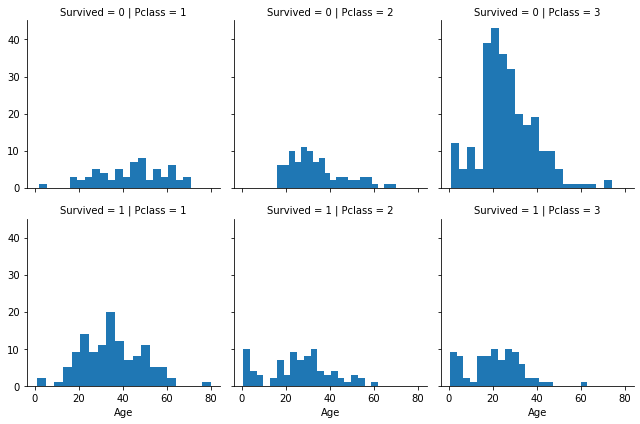

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
g=sns.FacetGrid(train,col='Pclass',row='Survived')
g.map(plt.hist,'Age',bins=20)

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


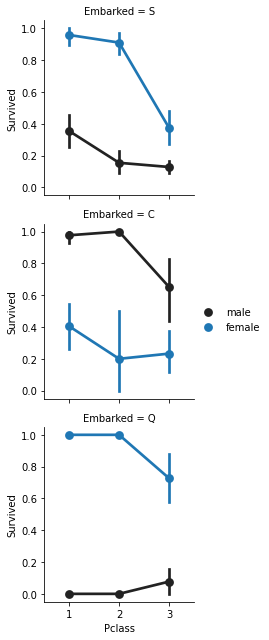

In [13]:
grid=sns.FacetGrid(train,row='Embarked')
grid.map(sns.pointplot,'Pclass','Survived','Sex')
grid.add_legend()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


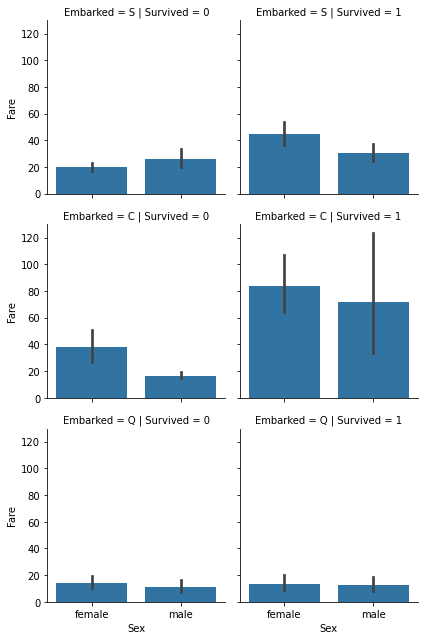

In [14]:
grid1=sns.FacetGrid(train,row='Embarked',col='Survived')
grid1.map(sns.barplot,'Sex','Fare')

In [15]:
print(train['Cabin'].isnull().sum())

687


In [16]:
train=train.drop(['Ticket','Cabin'],axis=1)
test=test.drop(['Ticket','Cabin'],axis=1)
combine=[train,test]
print(combine[0].shape)
print(combine[1].shape)

(891, 10)
(418, 9)


In [17]:
for data in combine:
  data['Title']=data.Name.str.extract('([A-Za-z]+)\.',expand=False)
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [18]:
for data in combine:
  data['Title']=data['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
  data['Title']=data['Title'].replace('Mlle','Miss')
  data['Title'] = data['Title'].replace('Ms', 'Miss')
  data['Title'] = data['Title'].replace('Mme', 'Mrs')
train[['Title','Survived']].groupby(by='Title').mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


In [19]:
titlemap={"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for data in combine:
  data['Title']=data['Title'].map(titlemap)
  data['Title']=data['Title'].fillna(0)

In [20]:
train.columns
train=train.drop(['Name','PassengerId'],axis=1)
test=test.drop(['Name'],axis=1)
print(train.shape)
print(test.shape)
combine=[train,test]

(891, 9)
(418, 9)


In [21]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} )

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [22]:
for data in combine:
  print(data.isnull().sum())
  print('-'*30)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64
------------------------------
PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
Title           0
dtype: int64
------------------------------


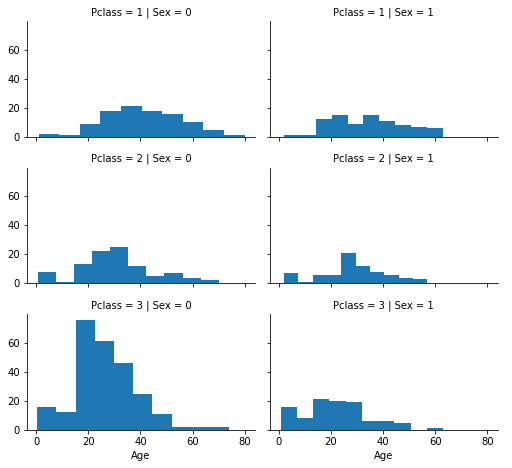

In [23]:
grid=sns.FacetGrid(train,col='Sex',row='Pclass',height=2.2,aspect=1.6)
grid.map(plt.hist,'Age')
grid.add_legend()

In [24]:
train['Age'].fillna(30,inplace=True)
test['Age'].fillna(30,inplace=True)
combine=[train,test]
for data in combine:
  print(data.isnull().sum())
  print('-'*30)
print(train['Age'])

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64
------------------------------
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
Title          0
dtype: int64
------------------------------
0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In [25]:
train['AgeBand']=pd.cut(train['Age'],5)
train['AgeBand']
train[['AgeBand','Survived']].groupby('AgeBand',as_index=False).mean().sort_values(by='AgeBand',ascending=False)

,AgeBand,Survived
4,"(64.084, 80.0]",0.090909
3,"(48.168, 64.084]",0.434783
2,"(32.252, 48.168]",0.404255
1,"(16.336, 32.252]",0.344168
0,"(0.34, 16.336]",0.550000


In [26]:
for data in combine:
  data.loc[ data['Age'] <= 16, 'Age'] = 0
  data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
  data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
  data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
  data.loc[ data['Age'] > 64, 'Age']
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1.0,1,0,7.2500,S,1,"(16.336, 32.252]"
1,1,1,1,2.0,1,0,71.2833,C,3,"(32.252, 48.168]"
2,1,3,1,1.0,0,0,7.9250,S,2,"(16.336, 32.252]"
3,1,1,1,2.0,1,0,53.1000,S,3,"(32.252, 48.168]"
4,0,3,0,2.0,0,0,8.0500,S,1,"(32.252, 48.168]"


In [27]:
train=train.drop(['AgeBand'],axis=1)
combine=[train,test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,S,1
1,1,1,1,2.0,1,0,71.2833,C,3
2,1,3,1,1.0,0,0,7.9250,S,2
3,1,1,1,2.0,1,0,53.1000,S,3
4,0,3,0,2.0,0,0,8.0500,S,1


In [28]:
train.describe(include='O')

,Embarked
count,889
unique,3
top,S
freq,644


In [29]:
train['Embarked']=train['Embarked'].fillna('S')
print(train['Embarked'].isnull().sum())
train[['Embarked','Survived']].groupby('Embarked',as_index=False).mean().sort_values(by='Survived',ascending=False)


0


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [30]:
combine=[train,test]
for data in combine:
  data['Embarked']=data['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,0,1
1,1,1,1,2.0,1,0,71.2833,1,3
2,1,3,1,1.0,0,0,7.9250,0,2
3,1,1,1,2.0,1,0,53.1000,0,3
4,0,3,0,2.0,0,0,8.0500,0,1


In [31]:
test['Fare'].fillna(35,inplace=True)
test.isnull().sum()
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [32]:
train['FareBand']=pd.qcut(train['Fare'],4)
train[['FareBand','Survived']].groupby('FareBand',as_index=False).mean().sort_values(by='FareBand',ascending=False)

,FareBand,Survived
3,"(31.0, 512.329]",0.581081
2,"(14.454, 31.0]",0.454955
1,"(7.91, 14.454]",0.303571
0,"(-0.001, 7.91]",0.197309


In [33]:
for data in combine:
  data.loc[data['Fare']<=7.91,'Fare']=0
  data.loc[(data['Fare']>=7.91)&(data['Fare']<=14.454),'Fare']=1
  data.loc[(data['Fare']>=14.454)&(data['Fare']<=31.0),'Fare']=2
  data.loc[(data['Fare']>=31.0)&(data['Fare']<=512.39),'Fare']=3
  data['Fare']=data['Fare'].astype(int)
combine=[train,test]
print(train.columns.values)
print(train.shape)
print(train.head())


['Survived' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked' 'Title'
 'FareBand']
(891, 10)
   Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  Title  \
0         0       3    0  1.0      1      0     0         0      1   
1         1       1    1  2.0      1      0     3         1      3   
2         1       3    1  1.0      0      0     1         0      2   
3         1       1    1  2.0      1      0     3         0      3   
4         0       3    0  2.0      0      0     1         0      1   

          FareBand  
0   (-0.001, 7.91]  
1  (31.0, 512.329]  
2   (7.91, 14.454]  
3  (31.0, 512.329]  
4   (7.91, 14.454]  


In [34]:
combine=[train,test]
for data in combine:
  data['Family']=data['Parch']+data['SibSp']+1
train[['Family','Survived']].groupby(['Family'],as_index=False).mean().sort_values(by='Survived',ascending=False)
for data in combine:
  data['isalone']=0
  data.loc[data['Family']==1,'isalone']=1
train[['isalone','Survived']].groupby('isalone',as_index=False).mean().sort_values(by='Survived')

,isalone,Survived
1,1,0.303538
0,0,0.505650


In [35]:
train=train.drop(['SibSp','Parch','Family','FareBand'],axis=1)
test=test.drop(['SibSp','Parch','Family'],axis=1)
print(train.columns.values)
print(test.columns.values)

['Survived' 'Pclass' 'Sex' 'Age' 'Fare' 'Embarked' 'Title' 'isalone']
['PassengerId' 'Pclass' 'Sex' 'Age' 'Fare' 'Embarked' 'Title' 'isalone']


In [36]:
train['Age']=train['Age'].astype('int')
train.dtypes

Survived    int64
Pclass      int64
Sex         int64
Age         int64
Fare        int64
Embarked    int64
Title       int64
isalone     int64
dtype: object

In [37]:
from sklearn.model_selection import train_test_split as tts
X=train.drop(['Survived'],axis=1)
y=train['Survived']
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.2,random_state=2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(712, 7) (179, 7) (712,) (179,)


In [38]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import accuracy_score

In [39]:
log=LogisticRegression()
parameters={'C':np.linspace(1,15,50)}
bestmode=GridSearchCV(log,parameters,cv=5)
bestmode.fit(X_train,y_train)
print(bestmode.best_estimator_)
print('trainingscore',round(bestmode.score(X_train,y_train)*100,2))
print('testscore',round(bestmode.score(X_test,y_test)*100,2))

LogisticRegression()
trainingscore 81.88
testscore 79.89


In [40]:
knn=KNeighborsClassifier()
parameters={'n_neighbors':[1,3,5,7,9]}
bestmode=GridSearchCV(knn,parameters,cv=5)
bestmode.fit(X_train,y_train)
#knn.fit(X_train,y_train)
print(bestmode.best_estimator_)
print('trainingscore:',round(bestmode.score(X_train,y_train)*100,2))
print('testscore:',round(bestmode.score(X_test,y_test)*100,2))

KNeighborsClassifier()
trainingscore: 84.55
testscore: 78.77


In [41]:
svm=SVC()
parameters={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf','linear']}
bestmode=GridSearchCV(svm,parameters,cv=5)
bestmode.fit(X_train,y_train)
print(bestmode.best_estimator_)
print('trainingscore:',round(bestmode.score(X_train,y_train)*100,2))
print('testscore:',round(bestmode.score(X_test,y_test)*100,2))

SVC(C=10, gamma=0.1)
trainingscore: 84.69
testscore: 79.33


In [42]:
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)
parameters={'max_depth':range(1,11),'max_features':range(1,6)}
bestmode=GridSearchCV(tree,parameters,cv=5)
bestmode.fit(X_train,y_train)
print(bestmode.best_estimator_)
print('trainingscore:',round(bestmode.score(X_train,y_train)*100,2))
print('testscore:',round(bestmode.score(X_test,y_test)*100,2))
print('default trainingscore:',round(tree.score(X_train,y_train)*100,2))
print('default testscore:',round(tree.score(X_test,y_test)*100,2))

DecisionTreeClassifier(max_depth=5, max_features=3)
trainingscore: 83.43
testscore: 78.77
default trainingscore: 87.64
default testscore: 80.45


In [43]:
forest=RandomForestClassifier(random_state=1)
forest.fit(X_train,y_train)
parameters={'max_depth':range(1,10),'n_estimators':[1,100,1000],'max_features':['sqrt','log2']}
bestmode=GridSearchCV(forest,parameters,cv=5)
bestmode.fit(X_train,y_train)
print(bestmode.best_estimator_)
print('trainingscore:',round(bestmode.score(X_train,y_train)*100,2))
print('testscore:',round(bestmode.score(X_test,y_test)*100,2))
print('default trainingscore:',round(forest.score(X_train,y_train)*100,2))
print('default testscore:',round(forest.score(X_test,y_test)*100,2))

RandomForestClassifier(max_depth=5, max_features='sqrt', random_state=1)
trainingscore: 84.83
testscore: 78.21
default trainingscore: 87.64
default testscore: 80.45


In [44]:
nn=MLPClassifier()
bestmode=RandomizedSearchCV(knn,para,cv=5)
nn.fit(X_train,y_train)
print('trainingscore:',round(nn.score(X_train,y_train)*100,2))
print('testscore:',round(nn.score(X_test,y_test)*100,2))

NameError: name 'para' is not defined

In [45]:
forest=RandomForestClassifier(random_state=1)
forest.fit(X_train,y_train)

pred=forest.predict(test.drop('PassengerId',axis=1))
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": pred
    })
submission.to_csv('submission.csv', index=False)